In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_error

In [ ]:
df = pd.read_csv('Subchlorophyll_MODIS_cleaned.csv')
df

,Longitude,Latitude,Value
0,79.854162,10.8125,3.489328
1,79.895828,10.8125,3.206421
2,79.937495,10.8125,2.502509
3,79.979162,10.8125,1.198490
4,80.020828,10.8125,0.892554
...,...,...,...
1870,79.520828,7.9375,2.790414
1871,79.562495,7.9375,2.533050
1872,79.604162,7.9375,2.107850
1873,79.645828,7.9375,1.894552


In [ ]:
df.describe()

,Longitude,Latitude,Value
count,1875.000000,1875.000000,1875.000000
mean,79.744939,9.466656,1.536376
std,0.712416,0.806328,1.527079
min,78.354162,7.937500,0.202986
25%,79.229162,8.854167,0.554822
50%,79.645828,9.520833,0.948165
75%,80.354162,10.145833,2.156182
max,81.020828,10.812500,21.675623


In [ ]:
df.shape

(1875, 3)

array([[<Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Latitude'}>],
       [<Axes: title={'center': 'Value'}>, <Axes: >]], dtype=object)

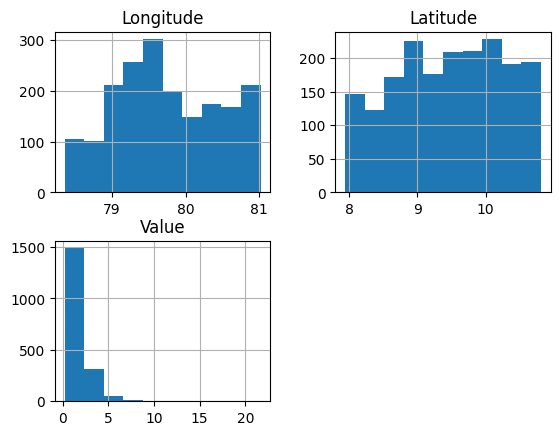

In [ ]:
df.hist()

In [ ]:
x = df.drop(columns='Value')
y = df['Value']

In [ ]:
x

,Longitude,Latitude
0,79.854162,10.8125
1,79.895828,10.8125
2,79.937495,10.8125
3,79.979162,10.8125
4,80.020828,10.8125
...,...,...
1870,79.520828,7.9375
1871,79.562495,7.9375
1872,79.604162,7.9375
1873,79.645828,7.9375


In [ ]:
y.shape

(1875,)

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
Dmodel = DecisionTreeRegressor()
Dmodel.fit(X_train,Y_train)

DecisionTreeRegressor()

In [ ]:
Dpred = Dmodel.predict(X_test)
Dpred

array([ 1.1434852 ,  2.4443517 ,  2.7892022 ,  0.47526428,  2.2127898 ,
        0.34533682,  0.24698143,  0.8202322 ,  1.7053523 ,  2.69496   ,
        0.8653616 ,  0.69279355,  2.123418  ,  0.88055086,  0.8725587 ,
        0.5509595 ,  1.3869482 ,  2.4086437 ,  1.9967599 ,  0.2818866 ,
        1.498678  ,  2.0804863 ,  0.81805795,  1.2247503 ,  0.24698083,
        0.43195912,  2.0895133 ,  1.0019542 ,  1.292784  ,  0.83415973,
        3.6503816 ,  2.7342458 ,  2.060177  ,  2.034152  ,  0.26583213,
        3.84467   ,  7.777296  ,  2.0735223 ,  1.7753282 ,  0.59191024,
        0.6108957 ,  1.0274793 ,  1.7753282 ,  2.899306  ,  0.37686086,
        2.74575   ,  0.4923169 ,  2.2938142 ,  1.0112708 ,  2.280724  ,
        1.9571196 ,  0.31430966,  2.717708  ,  0.22890551,  1.4428494 ,
        2.5132825 ,  0.28625348,  0.33227682,  1.6479307 ,  2.6721704 ,
        0.6422591 ,  2.7642713 ,  2.5511026 ,  1.1736515 ,  2.3015695 ,
        0.37061805,  1.2950954 ,  0.3064729 ,  1.0450456 ,  1.96

In [ ]:
dscore = Dmodel.score(X_train,Y_train)
dscore

1.0

In [ ]:
dscore = Dmodel.score(X_test,Y_test)
dscore

0.46329449149050805

In [ ]:
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,AdaBoostRegressor

Rmodel = RandomForestRegressor(
    n_estimators=1000,
    max_depth=6,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

Rmodel.fit(X_train, Y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=1000, random_state=42)

# **Random Forest Regressor**

In [ ]:
score = Rmodel.score(X_train, Y_train)
score

0.8328532806731065

In [ ]:
Rpred = Rmodel.predict(X_test)
Rpred

array([0.77963894, 2.46738072, 2.65228503, 0.42350543, 2.15502885,
       0.44696436, 0.41040429, 0.71033622, 1.8760838 , 2.45727337,
       0.50444023, 0.68093227, 2.25400274, 0.9247306 , 0.9071781 ,
       0.54057743, 1.50017243, 2.36789114, 2.44982055, 0.44696436,
       1.8747246 , 1.92999801, 0.8022271 , 1.44208656, 0.41040429,
       0.7545791 , 2.2846441 , 1.26814829, 1.31981923, 0.77521789,
       3.24056091, 2.89659451, 2.17156331, 2.39231101, 0.41040429,
       3.32240663, 7.57259122, 4.28365654, 1.94647854, 0.78898267,
       0.6533193 , 1.43775856, 1.89292982, 4.1071577 , 0.49576586,
       2.71995543, 0.61505298, 2.51435453, 0.93321678, 1.90412476,
       3.17970205, 0.41237864, 3.47684656, 0.28025847, 0.99646328,
       2.44398633, 0.41100003, 0.43078757, 2.4015007 , 4.34349409,
       0.43200198, 3.23900151, 2.54666709, 0.97641957, 2.5634967 ,
       0.59991107, 1.2889505 , 0.87357328, 0.84537939, 2.04738279,
       2.72065907, 2.89911873, 0.43158382, 0.47990613, 1.06744

In [ ]:
rmse = mean_squared_error(Y_test, Rpred)
Rrmse = np.sqrt(rmse)
print('mse:',rmse)
print('rmse:',Rrmse)

mse: 0.7542119051093561
rmse: 0.8684537437937361


In [ ]:
test_score = Rmodel.score(X_test, Y_test)
test_score

0.7335512060176237

In [ ]:
import xgboost as xgb

# **XGBOOST**

In [ ]:
Xmodel = xgb.XGBRegressor(n_estimators=1000,random_state=42,verbose=True)
Xmodel.fit(X_train,Y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:30:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
xpred = Xmodel.predict(X_test)
xpred

array([ 0.7814074 ,  2.2713523 ,  2.7315347 ,  0.40554634,  1.9905946 ,
        0.27991986,  0.26913586,  0.7257542 ,  1.6111131 ,  2.812318  ,
        0.70715255,  0.7089901 ,  4.1164355 ,  0.96917444,  0.7921086 ,
        0.508549  ,  1.7856948 ,  2.304028  ,  2.0571413 ,  0.27901182,
        1.7493851 ,  1.948558  ,  1.063243  ,  1.2519232 ,  0.27543902,
        1.0515891 ,  2.1395123 ,  1.3423811 ,  1.1858876 ,  0.8082641 ,
        3.3406703 ,  2.75345   ,  1.815993  ,  2.2427828 ,  0.23582904,
        4.751829  ,  8.432454  ,  2.4960928 ,  1.7756943 ,  0.60555947,
        0.5499483 ,  1.011688  ,  1.8676672 ,  3.2854757 ,  0.41668913,
        2.8631797 ,  0.5958837 ,  2.525785  ,  0.9889235 ,  2.3377938 ,
        1.312     ,  0.30589646,  3.1148384 ,  0.25037786,  1.1814797 ,
        2.4826279 ,  0.28899384,  0.31750345,  1.9743192 ,  3.2073238 ,
        0.5681124 ,  3.2452433 ,  2.6245496 ,  0.74800354,  2.231907  ,
        0.36171237,  1.1998632 ,  0.5878729 ,  0.9575774 ,  1.91

In [ ]:
xscore = Xmodel.score(X_train,Y_train)
xscore

0.9999304351867446

In [ ]:
xmse = mean_squared_error(Y_test,xpred)
xmse

0.5123684265527341

In [ ]:
xtescore = Xmodel.score(X_test,Y_test)
xtescore

0.8189899305423598

In [ ]:
Emodel = ExtraTreesRegressor(n_estimators=1000,random_state=43)
Emodel.fit(X_train,Y_train)

ExtraTreesRegressor(n_estimators=1000, random_state=43)

In [ ]:
Epred = Emodel.predict(X_test)
Epred

array([ 0.86348197,  2.4015754 ,  2.82331921,  0.4400042 ,  2.16314968,
        0.31065052,  0.24050505,  0.83509743,  1.73854198,  2.69224705,
        0.62614522,  0.73842984,  2.06651625,  0.94601191,  0.80970089,
        0.52389395,  1.78001136,  2.13268243,  2.11362271,  0.28042532,
        1.80147904,  1.94746092,  0.97328666,  1.32078416,  0.29693428,
        1.0158642 ,  2.08290845,  1.3975311 ,  1.28437353,  0.79889302,
        3.33599771,  2.56666774,  1.84809155,  2.34165472,  0.27096357,
        4.68349385,  7.93586446,  2.83828297,  1.82475891,  0.74105913,
        0.68095544,  0.93508531,  1.88198136,  3.08410163,  0.3907276 ,
        2.82963748,  0.56852601,  2.51421691,  0.97741135,  2.10175821,
        2.9061537 ,  0.31597877,  3.05296632,  0.29380164,  1.0713589 ,
        2.49703166,  0.27218772,  0.33078138,  1.99413301,  2.98395313,
        0.55043861,  3.41456095,  2.49523995,  0.7668621 ,  2.31732067,
        0.37154251,  1.17120215,  0.56896549,  1.0301562 ,  1.78

In [ ]:
Eprtest = Emodel.score(X_test,Y_test)
Eprtest

0.8460088687645132

In [ ]:
Emse = mean_squared_error(Y_test,Epred)
Emse

0.435888422398877

In [ ]:
Amodel = AdaBoostRegressor(n_estimators=1000,random_state=42)
Amodel.fit(X_train,Y_train)

AdaBoostRegressor(n_estimators=1000, random_state=42)

In [ ]:
Apred = Amodel.predict(X_test)
Apred

array([ 2.0975176 ,  2.40517582,  2.46306428,  1.3700663 ,  1.94818526,
        0.79288957,  1.38464166,  2.0975176 ,  2.22320239,  2.4247771 ,
        1.9586303 ,  2.45951512,  3.9483045 ,  3.71958109,  2.45951512,
        2.42126955,  1.38795766,  2.30397102,  2.22574537,  0.77202481,
        2.42463345,  1.98012974,  2.4503339 ,  2.7260535 ,  0.80620768,
        2.12845806,  1.82334591,  3.40024394,  2.5585239 ,  3.51618517,
        2.22574537,  3.64067483,  2.23247762,  2.17965479,  0.79288957,
        2.22372286, 11.51446153,  5.30285935,  1.94818526,  2.83318899,
        2.0975176 ,  2.71807433,  1.95967876,  4.89968563,  1.9586303 ,
        2.37916122,  1.9586303 ,  2.4247771 ,  2.66481905,  2.14191521,
        1.9338185 ,  0.82297974,  4.72377372,  2.10045873,  1.382653  ,
        2.7415404 ,  1.3700663 ,  0.85240814,  2.42633121,  5.30285935,
        0.85240814,  2.16043417,  2.5898153 ,  5.24975751,  4.4701518 ,
        1.98335683,  0.87218077,  2.04453704,  3.22945341,  2.38

In [ ]:
Amse = mean_squared_error(Y_test,Apred)
Amse

2.274642191437194

In [ ]:
Ascore = Amodel.score(X_train,Y_train)
Ascore

0.07249604648956254

In [ ]:
from sklearn.svm import SVR
smodel = SVR()
smodel.fit(X_train,Y_train)

SVR()

In [ ]:
spred = smodel.predict(X_test)

In [ ]:
smse = mean_squared_error(Y_test,spred)
smse

3.0536774612053037

In [ ]:
sscore = smodel.score(X_test,Y_test)
sscore

-0.07880646173484052

<Axes: >

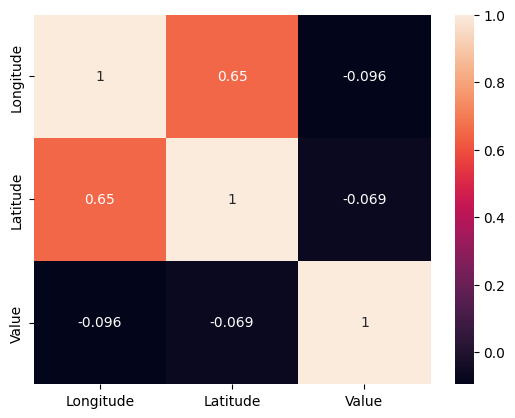

In [ ]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

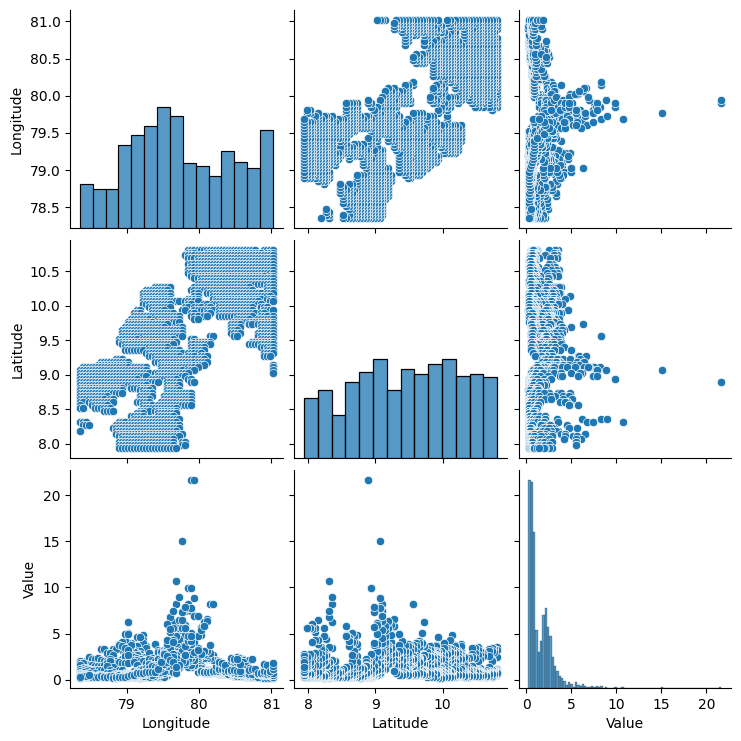

In [ ]:
sns.pairplot(df)

In [ ]:
models = ['Decision Tree', 'Random Forest', 'XGBoost', 'Extra Trees', 'AdaBoost', 'SVM']
train_scores = [dscore, score, xscore, Emodel.score(X_train,Y_train), Ascore, smodel.score(X_train,Y_train)]
test_scores = [dscore, test_score, xtescore, Eprtest, Amodel.score(X_test,Y_test), sscore]

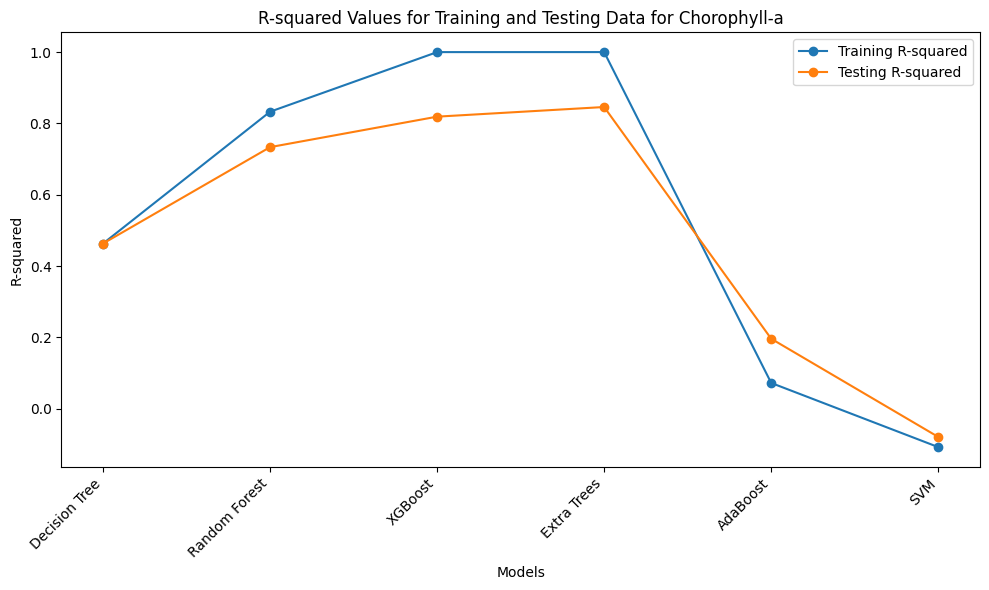

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(models, train_scores, marker='o', label='Training R-squared')
plt.plot(models, test_scores, marker='o', label='Testing R-squared')
plt.title('R-squared Values for Training and Testing Data for Chorophyll-a')
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()
plt.show()

<BarContainer object of 5 artists>

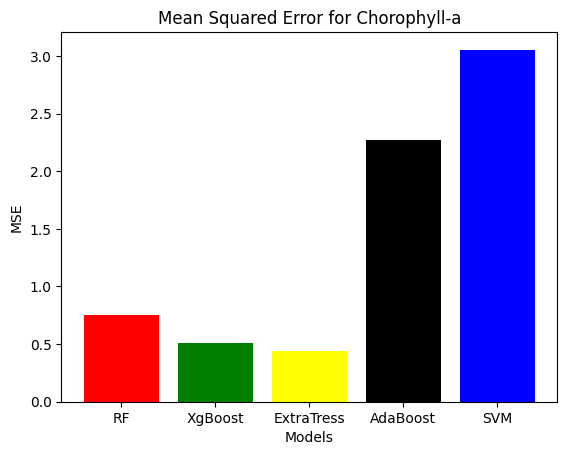

In [ ]:
x_values = ['RF','XgBoost','ExtraTress','AdaBoost','SVM']
y_values = [rmse,xmse,Emse,Amse,smse]
plt.title('Mean Squared Error for Chorophyll-a')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.bar(x_values,y_values,color=['Red','Green','yellow','black','blue'])

In [ ]:
train_scores

[0.46329449149050805,
 0.8328532806731065,
 0.9999304351867446,
 1.0,
 0.07249604648956254,
 -0.1072905687247625]

In [ ]:
test_scores

[0.46329449149050805,
 0.7335512060176237,
 0.8189899305423598,
 0.8460088687645132,
 0.19641195724430716,
 -0.07880646173484052]

In [ ]:
from sklearn.model_selection import cross_val_score,KFold
k_fold = KFold(n_splits=10,shuffle=True,random_state=42,)
cross_val = cross_val_score(Rmodel,x,y,cv=k_fold)
cross_val

array([0.78832043, 0.77155488, 0.81887054, 0.85363706, 0.6509747 ,
       0.89482409, 0.89292277, 0.67560582, 0.85836581, 0.86057265])

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gmodel = GradientBoostingRegressor(n_estimators=200,random_state=42,verbose=True)
gmodel.fit(X_train,Y_train)

      Iter       Train Loss   Remaining Time 
         1           2.0182            1.39s
         2           1.8598            0.84s
         3           1.7278            0.66s
         4           1.6150            0.56s
         5           1.5282            0.49s
         6           1.4141            0.45s
         7           1.3215            0.42s
         8           1.2535            0.39s
         9           1.1891            0.38s
        10           1.1369            0.36s
        20           0.8397            0.30s
        30           0.6903            0.25s
        40           0.6014            0.23s
        50           0.5075            0.20s
        60           0.4536            0.19s
        70           0.3972            0.18s
        80           0.3758            0.16s
        90           0.3651            0.14s
       100           0.3401            0.13s
       200           0.2302            0.00s


GradientBoostingRegressor(n_estimators=200, random_state=42, verbose=True)

In [ ]:
gpred = gmodel.predict(X_test)

In [ ]:
g_mse = mean_squared_error(Y_test,gpred)
g_mse

0.7150077018337526

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
Gmodel = GradientBoostingRegressor(n_estimators=2000,random_state=42,verbose=True)
Gmodel.fit(X_train,Y_train)

      Iter       Train Loss   Remaining Time 
         1           2.0182            3.16s
         2           1.8598            2.95s
         3           1.7278            2.82s
         4           1.6150            2.74s
         5           1.5282            3.10s
         6           1.4141            3.79s
         7           1.3215            3.63s
         8           1.2535            3.50s
         9           1.1891            3.39s
        10           1.1369            3.30s
        20           0.8397            2.84s
        30           0.6903            2.77s
        40           0.6014            2.67s
        50           0.5075            2.62s
        60           0.4536            2.55s
        70           0.3972            2.51s
        80           0.3758            2.47s
        90           0.3651            2.44s
       100           0.3401            2.41s
       200           0.2302            2.26s
       300           0.1764            2.12s
       40

GradientBoostingRegressor(n_estimators=2000, random_state=42, verbose=True)

In [ ]:
gPred = Gmodel.predict(X_test)

In [ ]:
g_mse1 = mean_squared_error(Y_test,gPred)
g_mse1

0.575055086319194

<BarContainer object of 2 artists>

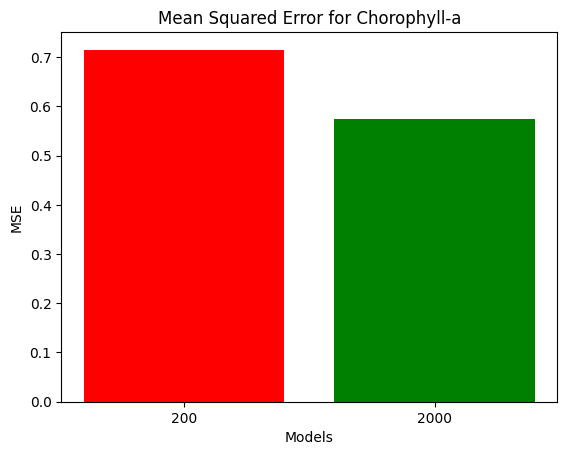

In [ ]:
x_values = ['200','2000']
y_values = [g_mse,g_mse1]
plt.title('Mean Squared Error for Chorophyll-a')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.bar(x_values,y_values,color=['Red','Green'])

<BarContainer object of 6 artists>

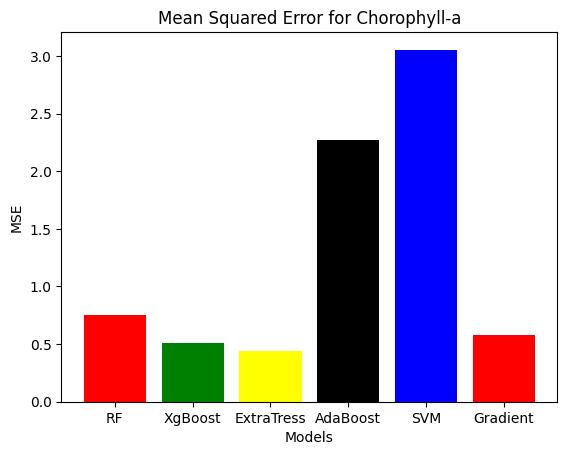

In [ ]:
x_values = ['RF','XgBoost','ExtraTress','AdaBoost','SVM','Gradient']
y_values = [rmse,xmse,Emse,Amse,smse,g_mse1]
plt.title('Mean Squared Error for Chorophyll-a')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.bar(x_values,y_values,color=['Red','Green','yellow','black','blue'])

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
rmape = mean_absolute_percentage_error(Y_test,Rpred)
xmape = mean_absolute_percentage_error(Y_test,xpred)
emape = mean_absolute_percentage_error(Y_test,Epred)
amape = mean_absolute_percentage_error(Y_test,Apred)
s_mape = mean_absolute_percentage_error(Y_test,spred)
g_mape = mean_absolute_percentage_error(Y_test,gPred)
print(rmape)
print(xmape)
print(emape)
print(amape)
print(s_mape)
print(g_mape)

0.2383983204532596
0.15302258190352064
0.1277600488710457
1.591120570133023
0.8322156076183501
0.18555295326756263


In [ ]:
racc = 1 - rmape
xacc = 1 - xmape
eacc = 1 - emape
aacc = 1 - amape
sacc = 1 - s_mape
gacc = 1 - g_mape
print(racc)
print(xacc)
print(eacc)
print(aacc)
print(sacc)
print(gacc)

0.7616016795467404
0.8469774180964793
0.8722399511289542
-0.5911205701330231
0.16778439238164988
0.8144470467324374


# **DL**